# Projekt: Breast Cancer Diagnosis

Author: Maria Beatriz Walter Costa 

This is a lab book from the breast cancer project. It contains python codes, results and other relevant information. 

Input dataset (Kaggle):  https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/download

The original dataset came from the University of Wisconsin (USA). It was composed of images of cell masses, which were converted with image recognition methods to a numerical matrix. This numerical matrix can be downloaded from Kaggle and is our starting point for the project. The matrix contains several numerical parameters and one categorical parameter, which indicates the cancer diagnosis: either 'M' for malign cancer, or 'B' for benign cancer. The matrix is composed of one header (column names) and 569 patient data (rows).

Hypothesis: we can differentiate between Malign (M) and Bening (B) cancer, based on numerical parameters.

Methodology: we will use machine learning methods for supervised learning (with training data), classification and prediction of diagnosis (with the probing data). For that we will apply logistic regression, random forest and neural networks (tensor flow).

## Import table from mySQL

I only performed this step because of Data Bases learning purposes, since the data can obviously be directly loaded into an object of PANDAS.

I loaded the original .csv table from Kaggle into mySQL with PHPmyAdmin. It is now an SQL formatted table. In order to export it as a .csv file, I used PHPmyAdmin. Afterwards, I will import the table into PANDAS, using the following directions: https://stackoverflow.com/questions/32912373/importing-multiple-sql-tables-using-pandas 

In [4]:
import pandas as pd
import pandas.io.sql as psql

#PATH for alphatraining Windows PC
df = pd.read_csv("C:/Users/Alfa/Documents/kaggle_breast-cancer-wisconsin.csv")

#PATH for maya
#df = pd.read_csv("/home/bia/Documents/Courses/alphatraining/Big Data/project/breast_cancer_diagnostics/kaggle_breast-cancer-wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#This code block formats the data for the plots in the next block

#Below I fixed the spaces in the column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

#When I ran the plots below, python3 said that support for uppercase single-letter colors is deprecated, so 
#I substituted 'M' for 'm' and 'B' for 'b'
df = df.replace(to_replace ="B", 
                 value ="b") 

df = df.replace(to_replace ="M", 
                 value ="m") 

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,m,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,m,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,m,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,m,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,m,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Normalisation of data

After discussing the data and the project with Anatol, we learned that for many classification problems, the dimension is an important issue. This is relevant for our project. Our data has the parameters with different unities (dimensions). We cannot apply a machine learning method, such as Neural Networks, directly on such data, since the different dimensions will be summed up.

We have in addition to that the problem that the greatness of numbers change greatly from column to column, which is a also problem for many methods that compare them directly. 

In summary, without normalization, one cannot compare the parameters directly.

There is a simple solution that solves both problems, which is the data normalization: numeric transformation to Z-score. For that we can apply this simple mathematical formula to all columns:

    X_new(w) = (X(w) - mittelwert(X in der Probe)) / (standardabweichung von X in der Probe)
    
In python code:
    
    df_normalized=(df-df.mean())/df.std()
    
In this experiment, I will do this normalization automatically, with a for loop.

In [25]:
#Code block below from: https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns
#!pip install pandas #If numpy is not yet installed 
import numpy as np

#With the "copy" function, one can indeed copy the whole object. Without this function, only a reference to the original 
#data is created, and therefore any transformation made to the reference is also made to the original data  

#Since I want to preserve the original data, I used the "copy" function to create a new object
df_normalized = df.copy()

#Get all columns from the dataframe and exclue the columns for which we do not want to normalize
cols_n = list(df_normalized.columns)
cols_n.remove('id')
cols_n.remove('diagnosis')
#df_normalized[cols_n].head()

#Iterate over the remaining columns to normalize the data and create a z-score column
for col_n in cols_n:
    #I commented the command below, since I wanted to completely substitute the values and not add columns to the old table
    #col_zscore = col + '_zscore'
    df_normalized[col_n] = (df_normalized[col_n] - df_normalized[col_n].mean())/df_normalized[col_n].std(ddof=0)

df_normalized.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Issue with normalization from training and test sets

The normalization from the complete dataset, as we did before, is not completely appropriate for machine learning, as pointed out by Jorge. The link below clarifies the issue. Ideally, we should first separate the raw data between training and test sets. Afterwards, normalize the training data, and then use the mean and std from the training data to normalize the test data. In this way, we don't bias the test set.

https://jamesmccaffrey.wordpress.com/2019/01/04/how-to-normalize-training-and-test-data-for-machine-learning/

In [ ]:
#Example from Vanessa:

#from sklearn.preprocessing import StandardScaler
#df['normAmount'] = StandardScaler().fit_transform(df[['Amount']])
#df = df.drop(['Amount'],axis=1)

## Explorative analysis

We made dot plots showing the distribution of values divided by group ('m', malign und 'b', benign). First I replaced spaces for underscores in the columns' names and replaced uppercase for lowercase in the diagnostics' column. Then, I plotted all parameters (columns) using a for loop. 

We saw that six parameters clearly separate between the two groups. With this results, we hypothesise that these parameters are directly relevant for the diagnosis (M or B).

In [5]:
#df_normalized.head()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


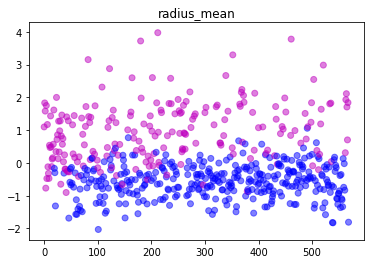

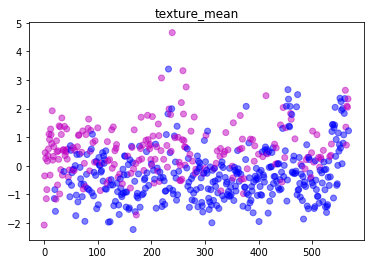

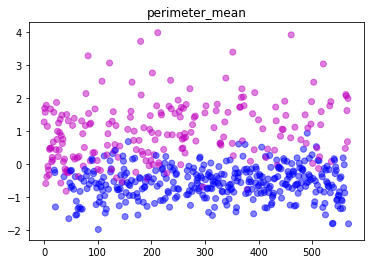

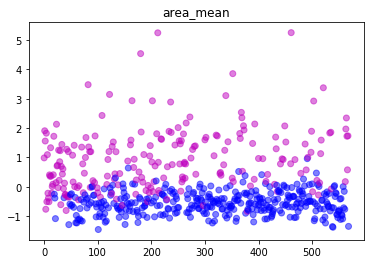

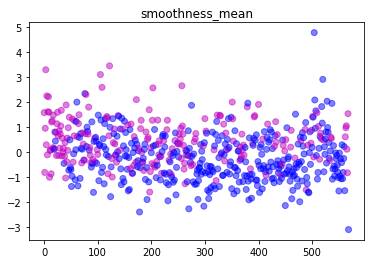

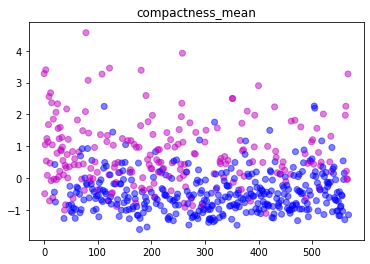

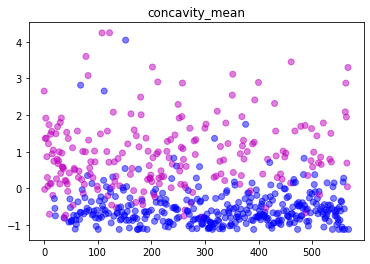

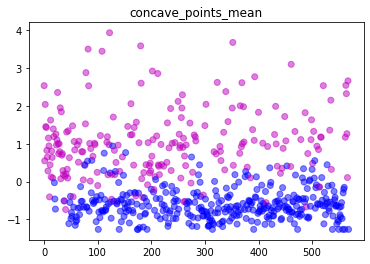

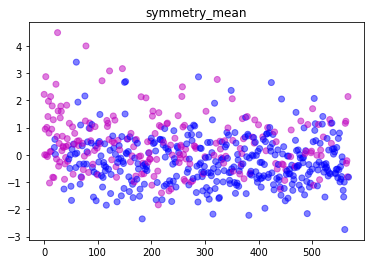

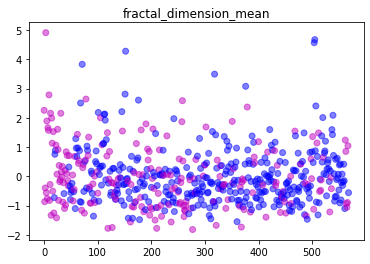

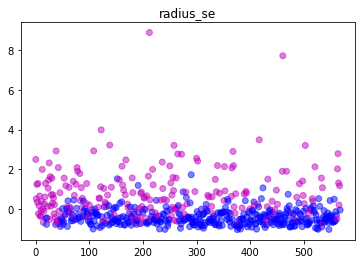

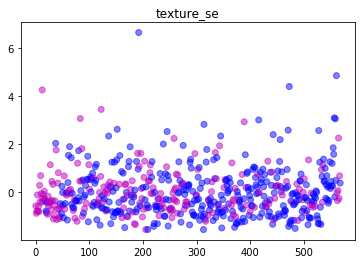

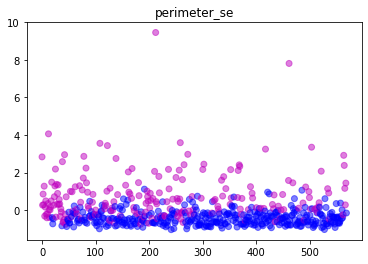

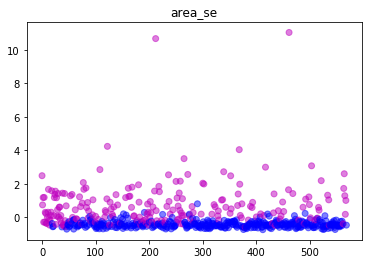

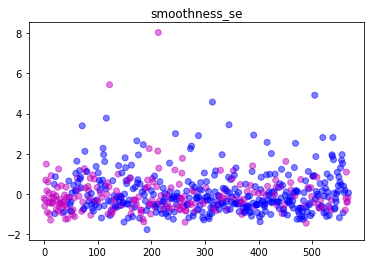

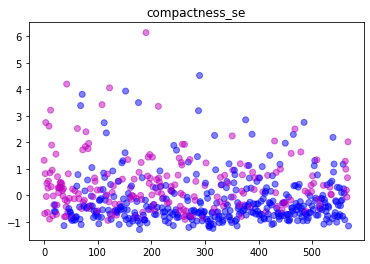

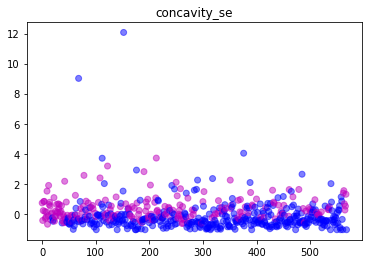

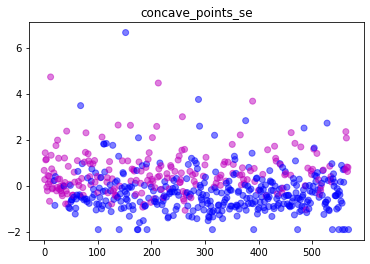

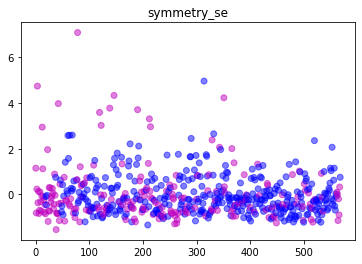

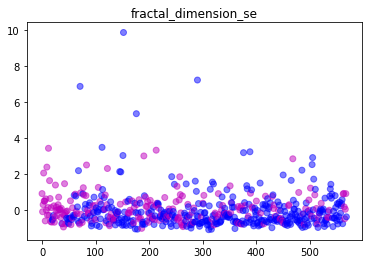

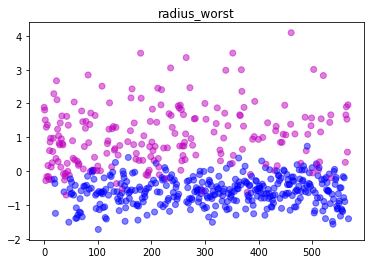

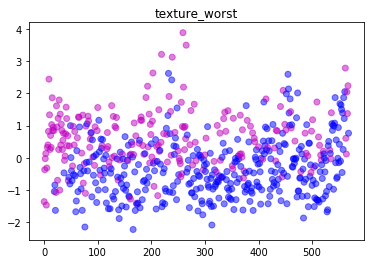

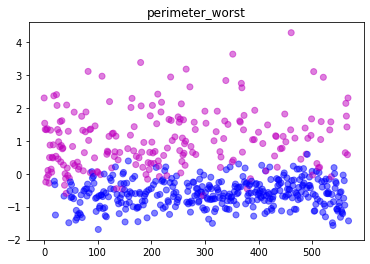

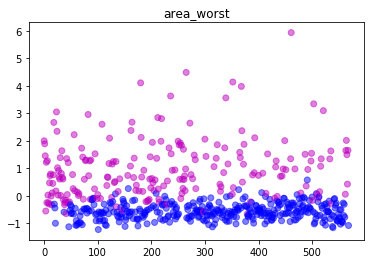

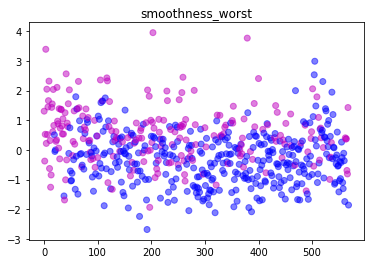

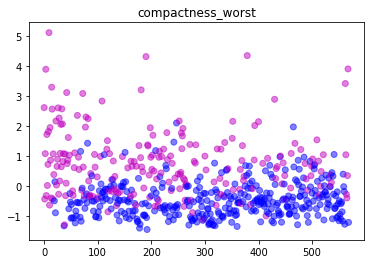

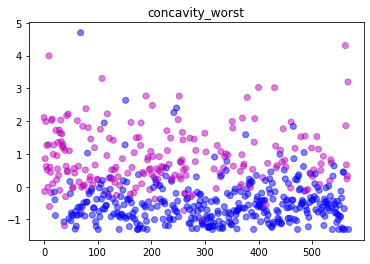

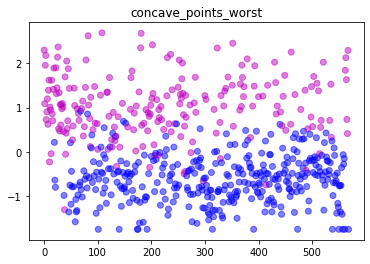

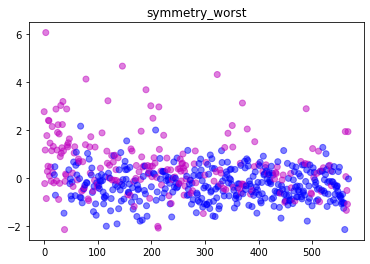

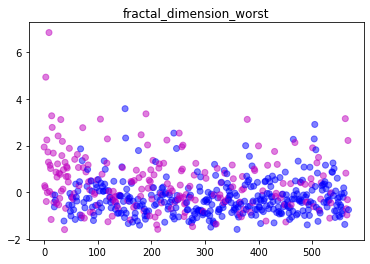

In [28]:
import matplotlib.pyplot as plt

#List: cols_n contains the column names of the normalized dataframe

cols_n = list(df_normalized.columns)

#Removing the categorical columns
cols_n.remove('id')
cols_n.remove('diagnosis')

#Using a for loop to print all parameters scatter plots, colored by diagnosis (M or B)

#for i in range(len(cols_n)): #Using the indexes of the list
for i in cols_n: #Using the elements of the list directly
#    plt.scatter(x=df_normalized.index, y=df_normalized[cols_n[i]], color = df_normalized.diagnosis, alpha=0.5)
    plt.scatter(x=df_normalized.index, y=df_normalized[i], color = df_normalized.diagnosis, alpha=0.5)
    plt.title(i)
    plt.show()
    

The table below summarizes the results from above. I analysed each of the figures visually and assigned a profile for each of them based on how well the two clusters (blue and pink) separate: (i) clusters are together; (ii) clusters are somewhat separated and (iii) clusters are separated. 

| Feature       | Cluster separation |
| ------------- |:-------------:|
| radius_mean   | separated |
| perimeter_mean | separated |
| area_mean | separated |
| radius_worst | separated |
| perimeter_worst | separated |
| area_worst | separated |
| texture_mean  | somewhat separated |
| compactness_mean | somewhat separated |
| concavity_mean | somewhat separated |
| concave_points_mean | somewhat separated |
| texture_worst | somewhat separated |
| compactness_worst | somewhat separated |
| concavity_worst | somewhat separated |
| concave points_worst | somewhat separated |
| smoothness_worst | together |
| smoothness_mean | together |
| symmetry_worst | together |
| fractal_dimension_worst | together |

## Machine learning classification

In this section, we will classify our data using Neural networks and the Tensor Flow library.

### TensorFlow Practice (MNIST Data)

In this subsection, I practiced with the MNIST dataset: http://yann.lecun.com/exdb/mnist/

This dataset comes from the MNIST database of handwritten digits. It contains a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Tutorial: https://www.tensorflow.org/tutorials/quickstart/beginner 

In [31]:
#!pip install tensorflow

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers:

In [35]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1056)

Build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training:

In [192]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train and evaluate the model:

In [193]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2935 - accuracy: 0.9139
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1407 - accuracy: 0.9585
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1064 - accuracy: 0.9677
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0879 - accuracy: 0.9727
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0780 - accuracy: 0.9754
10000/1 - 0s - loss: 0.0350 - accuracy: 0.9778


[0.06874611824413296, 0.9778]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the TensorFlow tutorials.

## Applying Tensor Flow to our Structured Data (project)

Now that I have experimented with the MNIST dataset, I will apply Tensor Flow directly in my dataframe object (df_normalized). The tutorial I am following is the following:

https://www.tensorflow.org/tutorials/structured_data/feature_columns

## Import the libraries:

In [1]:
#!pip install -q sklearn

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

## Split the dataframe into train, validation, and test

We will now split the dataframe into train, validation, and test sets.

In [9]:
#train, test = train_test_split(df_normalized, test_size=0.2)
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')
print('Attention: data is not yet normalized!')

364 train examples
91 validation examples
114 test examples
Attention: data is not yet normalized!


## Train data normalization

Following the discussion of data normalization, I first separated the data in sets (train, val and test). Below, I normalize the train set and store its values for mean and std, to use for the normalization of the other two sets.

In [22]:
#Code block below from: https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns
#!pip install pandas #If numpy is not yet installed 
import numpy as np

#With the "copy" function, one can indeed copy the whole object. Without this function, only a reference to the original 
#data is created, and therefore any transformation made to the reference is also made to the original data  

#Since I want to preserve the original data, I used the "copy" function to create a new object
train_normalized = train.copy()
val_normalized = val.copy()
test_normalized = test.copy()

#Get all columns from the dataframe and exclue the columns for which we do not want to normalize
cols_n = list(train_normalized.columns)
cols_n.remove('id')
cols_n.remove('diagnosis')
#df_normalized[cols_n].head()

#Iterate over the remaining columns to normalize the data and create a z-score column
for col_n in cols_n:
    
    #Getting the mean and standard deviation of the train data
    mean = train_normalized[col_n].mean()
    std = train_normalized[col_n].std(ddof=0)
    
    #Normalizing the training data
    train_normalized[col_n] = ( train_normalized[col_n] - mean ) / std

    #Normalizing the other two sets using the calculated mean and std
    val_normalized[col_n] = ( val_normalized[col_n] - mean ) / std
    test_normalized[col_n] = ( test_normalized[col_n] - mean ) / std
    print('col_n', col_n, 'mean', mean, 'std', std)
    
#train_normalized.head()
#val_normalized.head()
#test_normalized.head()

col_n radius_mean mean 14.337664835164837 std 3.637193661096955
col_n texture_mean mean 19.38958791208792 std 4.259186722072684
col_n perimeter_mean mean 93.43321428571429 std 25.10681518063414
col_n area_mean mean 676.5500000000001 std 370.8863589985602
col_n smoothness_mean mean 0.09659255494505498 std 0.013969581035107372
col_n compactness_mean mean 0.10641697802197804 std 0.0536997026429809
col_n concavity_mean mean 0.09245755686813185 std 0.08183871588542159
col_n concave_points_mean mean 0.05019637912087912 std 0.03890322470509572
col_n symmetry_mean mean 0.18106813186813187 std 0.02700071276682667
col_n fractal_dimension_mean mean 0.06285074175824172 std 0.007275923018317061
col_n radius_se mean 0.4212909340659341 std 0.303977746980872
col_n texture_se mean 1.2346387362637359 std 0.5378583353046085
col_n perimeter_se mean 2.989932142857144 std 2.2569400465131437
col_n area_se mean 43.04402747252746 std 51.244039963165456
col_n smoothness_se mean 0.0071045934065934084 std 0.00298

In [31]:
#Tests for the calculations

#cols_n

#train['radius_mean'].mean()
#val['radius_mean'].mean()
#test['radius_mean'].mean()

14.337664835164837

## Create an input pipeline using tf.data

Next, we will wrap the dataframes with tf.data. This will enable us to use feature columns as a bridge to map from the columns in the Pandas dataframe to features used to train the model. If we were working with a very large CSV file (so large that it does not fit into memory), we would use tf.data to read it from disk directly. That is not covered in this tutorial.

Since our data is small enough, it will be enough to just fit it into the memory.

In [ ]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(df_normalized, shuffle=True, batch_size=32):
  df_normalized = df_normalized.copy()
  labels = df_normalized.pop('diagnosis')
  ds = tf.data.Dataset.from_tensor_slices((dict(df_normalized), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df_normalized))
  ds = ds.batch(batch_size)
  return ds

In [3]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

NameError: name 'df_to_dataset' is not defined

## Understand the input pipeline

Now that we have created the input pipeline, let's call it to see the format of the data it returns. We have used a small batch size to keep the output readable.

In [42]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of radius_mean:', feature_batch['radius_mean'])
  print('A batch of targets:', label_batch )

Every feature: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
A batch of radius_mean: tf.Tensor([ 0.7534068  -0.1469182  -0.67234446  1.497524   -0.73482758], shape=(5,), dtype=float64)
A batch of targets: tf.Tensor([b'm' b'm' b'b' b'm' b'b'], shape=(5,), dtype=string)


We can see that the dataset returns a dictionary of column names (from the dataframe) that map to column values from rows in the dataframe.

## Demonstrate several types of feature column

TensorFlow provides many types of feature columns. In this section, we will create several types of feature columns, and demonstrate how they transform a column from the dataframe.

In [43]:
# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]

In [44]:
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

### Numeric columns
The output of a feature column becomes the input to the model (using the demo function defined above, we will be able to see exactly how each column from the dataframe is transformed). A numeric column is the simplest type of column. It is used to represent real valued features. When using this column, your model will receive the column value from the dataframe unchanged.

In [45]:
radius_mean = feature_column.numeric_column("radius_mean")
demo(radius_mean)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[-0.18384004]
 [-0.69222546]
 [-0.35424855]
 [-0.61838174]
 [ 1.5344459 ]]


### Categorical columns
In our dataset, diagnosis is represented as a string (e.g. 'm' or 'b'). We cannot feed strings directly to a model. Instead, we must first map them to numeric values. The categorical vocabulary columns provide a way to represent strings as a one-hot vector (much like you have seen above with age buckets). The vocabulary can be passed as a list using categorical_column_with_vocabulary_list, or loaded from a file using categorical_column_with_vocabulary_file.

In [46]:
#diagnosis = feature_column.categorical_column_with_vocabulary_list(
#      'diagnosis', ['b', 'm'])

#diagnosis_one_hot = feature_column.indicator_column(diagnosis)
#demo(diagnosis_one_hot)

#df_normalized.head()

#Didi not work!

## Choose which columns to use

We have seen how to use several types of feature columns. Now we will use them to train a model. The goal of this tutorial is to show you the complete code (e.g. mechanics) needed to work with feature columns. We have selected a few columns to train our model below arbitrarily.

Key point: If your aim is to build an accurate model, try a larger dataset of your own, and think carefully about which features are the most meaningful to include, and how they should be represented.

In [47]:
feature_columns = []

# numeric cols
for header in ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']:
  feature_columns.append(feature_column.numeric_column(header))

# indicator cols
diagnosis = feature_column.categorical_column_with_vocabulary_list(
      'diagnosis', ['m', 'b'])
diagnosis_one_hot = feature_column.indicator_column(diagnosis)
feature_columns.append(diagnosis_one_hot)

#Print the elements
#feature_columns

## Create a feature layer
Now that we have defined our feature columns, we will use a DenseFeatures layer to input them to our dataframe model.

In [48]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

Earlier, we used a small batch size to demonstrate how feature columns worked. We create a new input pipeline with a larger batch size.

In [49]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

## Create, compile, and train the model-- PROBLEM HERE -- STOPPED HERE

In [50]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



ValueError: in converted code:

    /home/bia/snap/jupyter/common/lib/python3.7/site-packages/tensorflow_core/python/feature_column/dense_features.py:131 call
        with ops.name_scope(column.name):
    /home/bia/snap/jupyter/common/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:6349 __enter__
        return self._name_scope.__enter__()
    /snap/jupyter/6/lib/python3.7/contextlib.py:112 __enter__
        return next(self.gen)
    /home/bia/snap/jupyter/common/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:4127 name_scope
        raise ValueError("'%s' is not a valid scope name" % name)

    ValueError: 'concave points_mean' is not a valid scope name


In [1]:
!pip install seaborn

     |████████████████████████████████| 215kB 2.3MB/s eta 0:00:01
